In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv('Position_Salaries.csv')

In [76]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
# X = np.array(ct.fit_transform(data))

In [77]:
X= data.iloc[:,1:-1].values

In [78]:
y= data.iloc[:,-1].values

In [79]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [80]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
## polynomial regression
## Here first we are converting polynomial to linear and training model
#so y= b0+ b1x1+ b2x2^2 so degree will be 2
## poly is for transforming powers to linear and then linear fit

from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree=4) #power of 2
X_poly = polynomial_regression.fit_transform(X)
linear_regression_2 = LinearRegression()
linear_regression_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
##Visualising training results

In [82]:
linear_regression.predict(X)

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

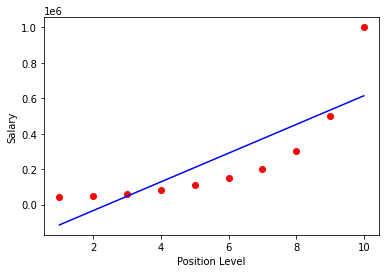

In [83]:
plt.scatter(X,y,color = 'red')
plt.plot(X,linear_regression.predict(X),color = 'blue')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

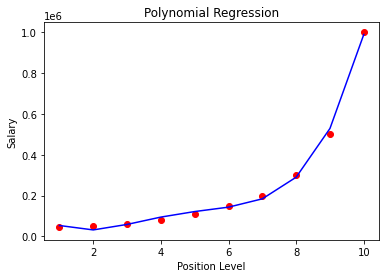

In [85]:
plt.scatter(X,y,color = 'red')
plt.plot(X,linear_regression_2.predict(polynomial_regression.fit_transform(X)),color = 'blue')
plt.title("Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()


In [89]:
linear_regression.predict([[6.5]])

array([330378.78787879])

In [92]:
linear_regression_2.predict(polynomial_regression.fit_transform([[6.5]]))

array([158862.45265155])

In [94]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[80878.78787879]
-195333.33333333337


In [ ]:
#so the equation will be 80878*level -195333

In [95]:
print(linear_regression_2.coef_)
print(linear_regression_2.intercept_)

[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
184166.66666719737


In [ ]:
#here it will be 0 -211002.331 * level + 94765.442 * level2 - 15463.  +184166(intercept)